In [29]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import matplotlib.pyplot as plt, numpy as np
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics

In [2]:
df = pd.read_csv("customer_analysis.csv", sep="\t")

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
#1
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
df = df.dropna()
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [7]:
#2
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [8]:
cek = (df.dtypes == 'object')
cat = list(cek[cek].index)
print(f'Categorical Variable: {cat}')

Categorical Variable: ['Education', 'Marital_Status']


In [10]:
# 1
df['Age'] = 2023-df['Year_Birth']
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,66
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,69
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,58
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,39
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,0,3,11,0,56
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,0,1,0,0,3,11,0,77
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,1,0,0,0,0,3,11,0,42
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,0,3,11,0,67


In [11]:
#2 - spent
df['Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts']
+ df['MntSweetProducts'] + df['MntGoldProds']

0       176
1         7
2        63
3         8
4        42
       ... 
2235    365
2236      8
2237     36
2238     91
2239     22
Length: 2216, dtype: int64

In [12]:
# 3
df['Living_With'] = df['Marital_Status'].replace({'Married':'Partner','Together':'Partner','Absurd':'Alone','Widow':'Alone','YOLO':'Alone','Divorced':'Alone','Single':'Alone'})

In [14]:
# 4
df['Children'] = df['Kidhome'] + df['Teenhome']
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_With,Children
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,66,1441,Alone,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,69,20,Alone,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,58,713,Partner,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,39,45,Partner,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,42,380,Partner,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,3,11,0,56,976,Partner,1
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,1,0,0,3,11,0,77,436,Partner,3
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,3,11,0,42,1205,Alone,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,3,11,0,67,752,Partner,1


In [15]:
# 5
df['Family_Size'] = df['Living_With'].replace({'Alone': 1, 'Partner': 2}) + df['Children']
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_With,Children,Family_Size
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,66,1441,Alone,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,69,20,Alone,2,3
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,58,713,Partner,0,2
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,39,45,Partner,1,3
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,42,380,Partner,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,3,11,0,56,976,Partner,1,3
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,3,11,0,77,436,Partner,3,5
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,3,11,0,42,1205,Alone,0,1
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,3,11,0,67,752,Partner,1,3


In [16]:
# 6
df['Is_Parent'] = np.where(df.Children > 0,1,0)

In [17]:
#7
df['Education'] = df['Education'].replace({'Basic':'Undergraduate','2nd Cycle':'Undergraduate','2n Cycle':'Undergraduate','Graduation':'Graduate','Master':'Postgraduate','PhD':'Postgraduate'})

In [18]:
# 8
drop = ["Marital_Status", "Kidhome", "Teenhome", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntGoldProds", "MntSweetProducts",  "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID",'AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain','Response']
df = df.drop(drop, axis=1)

In [19]:
df.head()

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,58,3,8,10,4,7,66,1441,Alone,0,1,0
1,Graduate,46344.0,38,2,1,1,2,5,69,20,Alone,2,3,1
2,Graduate,71613.0,26,1,8,2,10,4,58,713,Partner,0,2,0
3,Graduate,26646.0,26,2,2,0,4,6,39,45,Partner,1,3,1
4,Postgraduate,58293.0,94,5,5,3,6,5,42,380,Partner,1,3,1


In [20]:
# 1
from sklearn.preprocessing import LabelEncoder
df['Education'] = LabelEncoder().fit_transform(df['Education'])
df['Living_With'] = LabelEncoder().fit_transform(df['Living_With'])
display(df)

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,0,58138.0,58,3,8,10,4,7,66,1441,0,0,1,0
1,0,46344.0,38,2,1,1,2,5,69,20,0,2,3,1
2,0,71613.0,26,1,8,2,10,4,58,713,1,0,2,0
3,0,26646.0,26,2,2,0,4,6,39,45,1,1,3,1
4,1,58293.0,94,5,5,3,6,5,42,380,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,61223.0,46,2,9,3,4,5,56,976,1,1,3,1
2236,1,64014.0,56,7,8,2,5,7,77,436,1,3,5,1
2237,0,56981.0,91,1,2,3,13,6,42,1205,0,0,1,0
2238,1,69245.0,8,2,6,5,10,3,67,752,1,1,3,1


In [22]:
#2
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df

array([[-0.89418706,  0.2340627 ,  0.31053212, ..., -1.26480327,
        -1.75867284, -1.5813886 ],
       [-0.89418706, -0.23455948, -0.38050944, ...,  1.40580564,
         0.45000895,  0.63235564],
       [-0.89418706,  0.76947764, -0.79513438, ..., -1.26480327,
        -0.65433195, -1.5813886 ],
       ...,
       [-0.89418706,  0.18809052,  1.4507507 , ..., -1.26480327,
        -1.75867284, -1.5813886 ],
       [ 0.56926828,  0.67538765, -1.41707178, ...,  0.07050118,
         0.45000895,  0.63235564],
       [ 0.56926828,  0.02470453, -0.31140528, ...,  1.40580564,
         1.55434984,  0.63235564]])

In [23]:
#3
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
reduced = pd.DataFrame(pca.fit_transform(scaled_df), columns=(["PCA1", "PCA2", "PCA3"]))
reduced.describe().T

,count,mean,std,min,25%,50%,75%,max
PCA1,2216.0,1.250504e-16,2.175249,-6.117718,-1.848732,-0.450075,1.544247,6.361258
PCA2,2216.0,-2.595196e-17,1.464096,-4.177289,-1.028000,-0.126586,0.954448,6.012006
PCA3,2216.0,4.579169e-17,1.122949,-3.242074,-0.904199,-0.242862,0.882079,5.460692


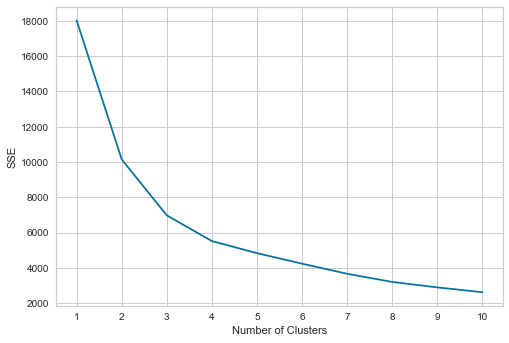

In [32]:
#clustering - 1
from sklearn.cluster import KMeans

kmeans_params = { "init": "random", "n_init": 10,"max_iter": 500,
                 "random_state": 32,}

SSE = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_params)
    kmeans.fit(reduced)
    SSE.append(kmeans.inertia_)

plt.plot(range(1, 11), SSE)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [34]:
from kneed import KneeLocator

findknee = KneeLocator(range(1, 11), SSE, curve="convex", direction="decreasing")
print('the best k for your model is', findknee.elbow)

the best k for your model is 3


In [35]:
# Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

n_clusters = 3
agg_clust = AgglomerativeClustering(n_clusters=n_clusters)
agg_clusters = agg_clust.fit_predict(reduced)
reduced['Cluster'] = agg_clusters
reduced

,PCA1,PCA2,PCA3,Cluster
0,3.187857,-0.054877,2.060188,1
1,-1.856933,-0.394893,0.408363,0
2,2.443833,0.049010,-0.425113,1
3,-1.871325,-0.841232,-0.592339,0
4,-0.557123,1.060059,-0.155290,2
...,...,...,...,...
2211,0.311882,1.378464,-0.239050,2
2212,-2.362675,4.207803,-0.058547,2
2213,2.742531,-1.551975,1.205391,1
2214,1.121818,1.659346,-0.830592,2


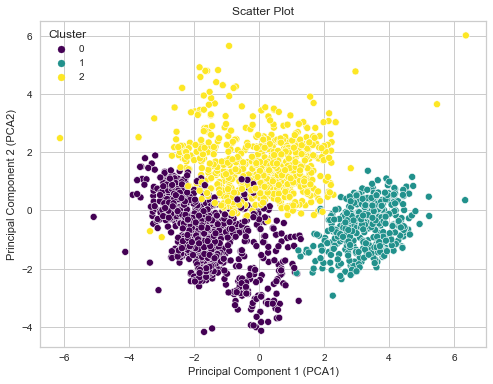

In [38]:
#scatter
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced['PCA1'], y=reduced['PCA2'], hue=agg_clusters, palette='viridis')
plt.title('Scatter Plot')
plt.xlabel('Principal Component 1 (PCA1)')
plt.ylabel('Principal Component 2 (PCA2)')
plt.legend(title='Cluster')
plt.show()

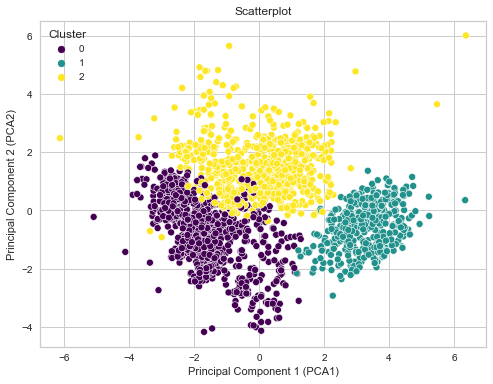

In [41]:
#visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=reduced, palette='viridis')
plt.title('Scatterplot')
plt.xlabel('Principal Component 1 (PCA1)')
plt.ylabel('Principal Component 2 (PCA2)')
plt.legend(title='Cluster')
plt.show()

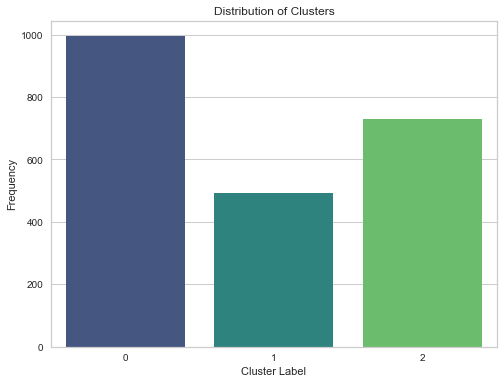

In [42]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=reduced, palette='viridis')
plt.title('Distribution of Clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Frequency')
plt.show()

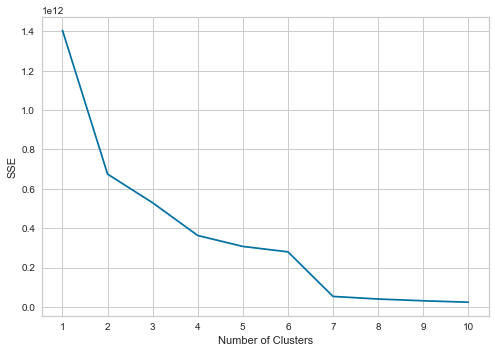

the best k for your model is 4


In [47]:
kmeans_params = { "init": "random", "n_init": 10,"max_iter": 300, "random_state": 42,}

SSE = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_params)
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)

plt.plot(range(1, 11), SSE)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

from kneed import KneeLocator

findknee = KneeLocator(range(1, 11), SSE, curve="convex", direction="decreasing")
print('the best k for your model is', findknee.elbow)

In [51]:
n_clusters = 4
agg_clust = AgglomerativeClustering(n_clusters=n_clusters)
agg_clusters = agg_clust.fit_predict(df)
df['Cluster'] = agg_clusters
df.head()

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Cluster
0,0,58138.0,58,3,8,10,4,7,66,1441,0,0,1,0,0
1,0,46344.0,38,2,1,1,2,5,69,20,0,2,3,1,3
2,0,71613.0,26,1,8,2,10,4,58,713,1,0,2,0,0
3,0,26646.0,26,2,2,0,4,6,39,45,1,1,3,1,1
4,1,58293.0,94,5,5,3,6,5,42,380,1,1,3,1,0


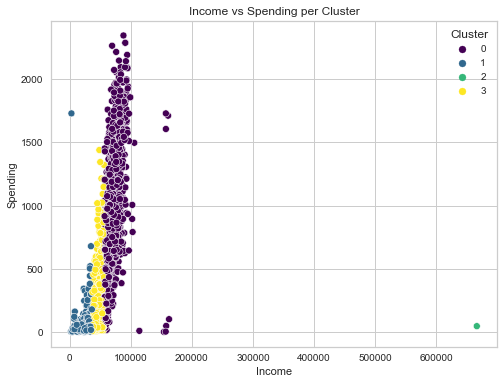

In [52]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='Spent', hue='Cluster', data=df, palette='viridis')
plt.title('Income vs Spending per Cluster')
plt.xlabel('Income')
plt.ylabel('Spending')
plt.legend(title='Cluster')
plt.show()